# *라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할
from sklearn.model_selection import train_test_split

#표준화
from sklearn.preprocessing import StandardScaler

#모델 라이브러리
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 평가지표
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# 한글 깨짐 방지
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

# 1. 데이터 불러오기

1) df: 인코딩되기 전 데이터로, 다중회귀분석에 사용되는 데이터 셋  
2) df_preprocessed : 인코딩과 더미화를 완료한 데이터로 나머지 모델(릿지, 라쏘, 트리계열)에 사용되는 데이터셋

In [3]:
df = pd.read_csv("df.csv", encoding = 'euc-kr')
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti Wagon R LXI CNG
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai Creta 1.6 CRDi SX Option
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda Jazz V
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti Ertiga VDI
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,Tata,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,Tata Tiago 1.05 Revotorq XT Option
6149,Ford,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,Ford EcoSport 1.5 Petrol Ambiente
6150,Jeep,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,Jeep Compass 1.4 Sport
6151,Maruti,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,Maruti Vitara Brezza ZDi


In [4]:
df_preprocessed= pd.read_csv("df_preprocessed1.csv", encoding = 'euc-kr')
df_preprocessed

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2682.68,2010,72000,1,1,4,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,0,1,0
1,19162.00,2015,41000,3,1,4,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,1
2,6898.32,2011,46000,2,1,4,18.20,1199.0,88.70,5.0,...,0,1,0,0,0,0,0,0,0,0
3,9197.76,2012,87000,3,1,4,20.77,1248.0,88.76,7.0,...,0,1,0,0,0,0,0,0,0,0
4,27194.71,2013,40670,3,2,3,15.20,1968.0,140.80,5.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,10822.70,2016,41413,3,1,4,27.28,1047.0,69.00,5.0,...,0,0,0,0,0,0,0,0,0,1
6149,13474.72,2017,39015,2,1,4,17.00,1497.0,121.36,5.0,...,0,0,0,0,0,0,1,0,0,0
6150,27838.55,2018,6000,2,1,4,16.00,1368.0,160.00,5.0,...,0,0,0,0,0,0,0,0,1,0
6151,16203.39,2017,21380,3,1,4,24.30,1248.0,88.50,5.0,...,0,0,0,0,0,0,1,0,0,0


## 2. 데이터 분할 및 scale 변환

### 1. 다중선형회귀모델 데이터 셋 분할 및 변환
=> 7:3으로 분리후, standardscaling 

In [6]:
# Standard객체 생성
mm_scaler = StandardScaler()

df_x = df.drop(["Price", "Name", "Location", "Fuel_Type","Transmission","Owner_Type","origin_name"] ,axis = 1)
df_scaled_x = pd.DataFrame(mm_scaler.fit_transform(df_x), columns = df_x.columns)

# 설명변수와 목표변수 합치기
df_com=pd.concat([df_scaled_x, df["Price"], df["Name"], df["Location"],df["Owner_Type"], df["Fuel_Type"], df["Transmission"]], axis=1)

In [7]:
df_train, df_test = train_test_split(df_com, test_size=0.3, random_state = 500)

### 2. 규제화 회귀 및 트리계열 데이터 셋 분할 및 변환
=> 7:3으로 분리후, standardscaling 

In [8]:
df_x = df_preprocessed.drop(columns = "Price")
df_y = df_preprocessed['Price']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                 test_size = 0.3,
                                                                 random_state = 500)

In [9]:
y_train = df_train_y
y_test = df_test_y

In [10]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train_x), columns = df_train_x.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test_x), columns = df_test_x.columns)

## 3. 최적모델 생성

#### 3.1 다중선형회귀

In [11]:
reg_model = smf.ols(formula='Price ~ + C(Location) + Year + Kilometers_Driven + Mileage + Power + Seats', data = df_train)
reg_result = reg_model.fit()

#### 3.2 Ridge 회귀

In [12]:
# ridge = Ridge(random_state=500, alpha=1)
# ridge.fit(X_train_scaled, y_train)

#### 3.3 Lasso 회귀

In [13]:
# lasso = Lasso(random_state=500, alpha=1)
# lasso.fit(X_train_scaled, y_train)

#### 3.4 ElasticNet 회귀

In [14]:
# elastic = ElasticNet(random_state=500, alpha=1, l1_ratio=0.5)
# elastic.fit(X_train_scaled, y_train)

#### 3.5 Decision Tree

In [15]:
tree_model = DecisionTreeRegressor(random_state=500, min_samples_leaf=7, min_samples_split=10, max_depth = 7)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=10,
                      random_state=500)

#### 3.6 RandomForest

In [16]:
rf_model = RandomForestRegressor(random_state=500, n_estimators = 60, max_depth = 8, min_samples_leaf=1
                                 , min_samples_split=6)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=6, n_estimators=60,
                      random_state=500)

#### 3.7 Gradient Boosting 

In [17]:
gb_model = GradientBoostingRegressor(random_state=500, n_estimators = 80, learning_rate = 0.2,  max_depth = 3,
                               min_samples_leaf=5, min_samples_split=22)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=5,
                          min_samples_split=22, n_estimators=80,
                          random_state=500)

## 4. 예측 및 결과

In [18]:
models = ["Regression", "Decision Tree", "RandomForest", "Gradient Boosting"]

r2, mse, rmse, mae, mape = [],[],[],[],[]

# 회귀분석예측 및 평가
lr_y_pred = reg_result.predict(df_test)
r2.append(r2_score(df_test['Price'], lr_y_pred))
mse.append(mean_squared_error(df_test['Price'], lr_y_pred))
rmse.append(mean_squared_error(df_test['Price'], lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], lr_y_pred))

# # 릿지 회귀분석예측 및 평가
# ridge_y_pred = ridge.predict(X_test_scaled)
# r2.append(r2_score(y_test, ridge_y_pred))
# mse.append(mean_squared_error(y_test, ridge_y_pred))
# rmse.append(mean_squared_error(y_test, ridge_y_pred, squared=False))
# mae.append(mean_absolute_error(y_test, ridge_y_pred))
# mape.append(mean_absolute_percentage_error(y_test, ridge_y_pred))

# # 라쏘 회귀분석예측 및 평가
# lasso_y_pred = lasso.predict(X_test_scaled)
# r2.append(r2_score(y_test, lasso_y_pred))
# mse.append(mean_squared_error(y_test, lasso_y_pred))
# rmse.append(mean_squared_error(y_test, lasso_y_pred, squared=False))
# mae.append(mean_absolute_error(y_test, lasso_y_pred))
# mape.append(mean_absolute_percentage_error(y_test, lasso_y_pred))

# # 엘라스틱넷 회귀분석예측 및 평가
# elastic_y_pred = elastic.predict(X_test_scaled)
# r2.append(r2_score(y_test, elastic_y_pred))
# mse.append(mean_squared_error(y_test, elastic_y_pred))
# rmse.append(mean_squared_error(y_test, elastic_y_pred, squared=False))
# mae.append(mean_absolute_error(y_test, elastic_y_pred))
# mape.append(mean_absolute_percentage_error(y_test, elastic_y_pred))


# 의사결정나무예측 및 평가
tree_y_pred = tree_model.predict(X_test_scaled)
r2.append(r2_score(y_test, tree_y_pred))
mse.append(mean_squared_error(y_test, tree_y_pred))
rmse.append(mean_squared_error(y_test, tree_y_pred, squared=False))
mae.append(mean_absolute_error(y_test, tree_y_pred))
mape.append(mean_absolute_percentage_error(y_test, tree_y_pred))

# 랜덤포레스트예측 및 평가
rf_y_pred = rf_model.predict(X_test_scaled)
r2.append(r2_score(y_test, rf_y_pred))
mse.append(mean_squared_error(y_test, rf_y_pred))
rmse.append(mean_squared_error(y_test, rf_y_pred, squared=False))
mae.append(mean_absolute_error(y_test, rf_y_pred))
mape.append(mean_absolute_percentage_error(y_test, rf_y_pred))

# 그래디언트부스팀예측 및 평가
gb_y_pred = gb_model.predict(X_test_scaled)
r2.append(r2_score(y_test, gb_y_pred))
mse.append(mean_squared_error(y_test, gb_y_pred))
rmse.append(mean_squared_error(y_test, gb_y_pred, squared=False))
mae.append(mean_absolute_error(y_test, gb_y_pred))
mape.append(mean_absolute_percentage_error(y_test, gb_y_pred))

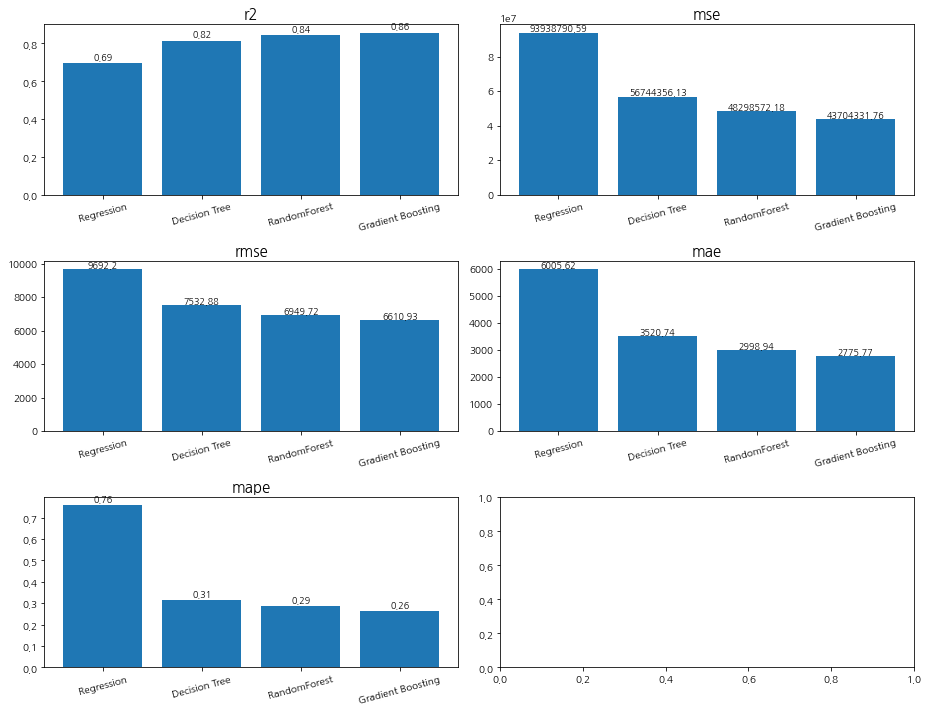

In [19]:
fig, ax = plt.subplots(3,2, figsize = (13,10))

for i, v in enumerate(r2):
    ax[0, 0].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[0, 0].bar(models, r2)
ax[0, 0].set_title("r2").set_fontsize(15)
ax[0, 0].tick_params(axis='x', rotation=15)

for i, v in enumerate(mse):
    ax[0, 1].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[0, 1].bar(models, mse)
ax[0, 1].set_title("mse").set_fontsize(15)
ax[0, 1].tick_params(axis='x', rotation=15)

for i, v in enumerate(rmse):
    ax[1, 0].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[1, 0].bar(models, rmse)
ax[1, 0].set_title("rmse").set_fontsize(15)
ax[1, 0].tick_params(axis='x', rotation=15)

for i, v in enumerate(mae):
    ax[1, 1].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[1, 1].bar(models, mae)
ax[1, 1].set_title("mae").set_fontsize(15)
ax[1, 1].tick_params(axis='x', rotation=15)

for i, v in enumerate(mape):
    ax[2, 0].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[2, 0].bar(models, mape)
ax[2, 0].set_title("mape").set_fontsize(15)
ax[2, 0].tick_params(axis='x', rotation=15)

plt.subplots_adjust(hspace=0.5)  # 세로 간격 조정

plt.tight_layout()
plt.show()

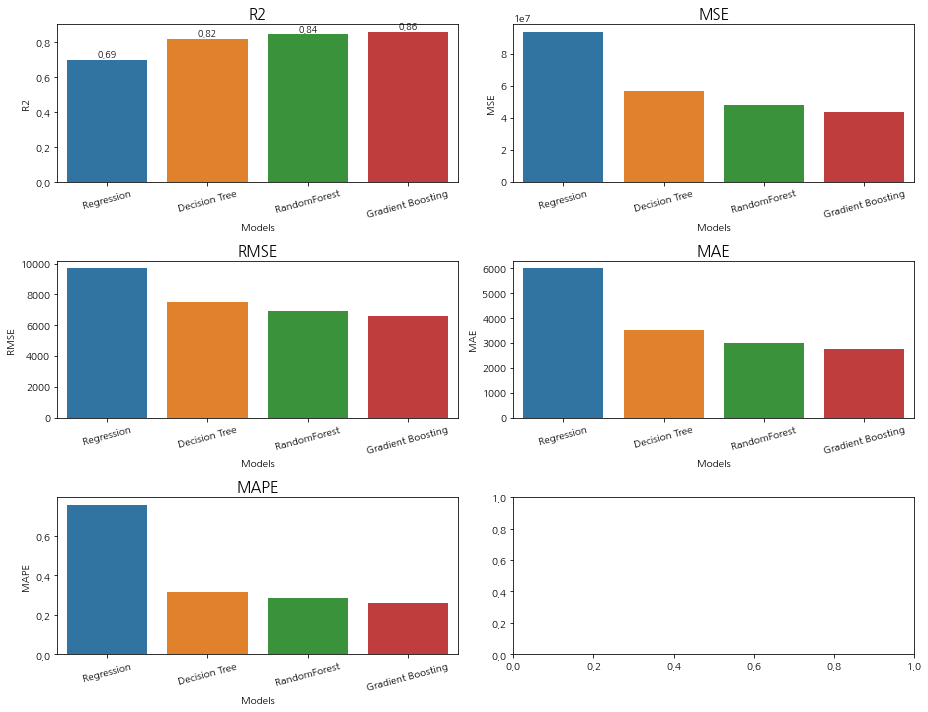

In [20]:
# 데이터 프레임 생성
data = {"Models": models,
        "R2":r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape}
df = pd.DataFrame(data)

fig, ax = plt.subplots(3, 2, figsize=(13, 10))
sns.barplot(x="Models", y="R2", data=df, ax=ax[0, 0])
ax[0, 0].set_title("R2").set_fontsize(15)
ax[0, 0].tick_params(axis='x', rotation=15)
ax[0, 0].tick_params(axis='x', rotation=15)

for i, v in enumerate(r2):
    ax[0, 0].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)

sns.barplot(x="Models", y="MSE", data=df, ax=ax[0, 1])
ax[0, 1].set_title("MSE").set_fontsize(15)
ax[0, 1].tick_params(axis='x', rotation=15)
ax[0, 1].tick_params(axis='x', rotation=15)

sns.barplot(x="Models", y="RMSE", data=df, ax=ax[1, 0])
ax[1, 0].set_title("RMSE").set_fontsize(15)
ax[1, 0].tick_params(axis='x', rotation=15)
ax[1, 0].tick_params(axis='x', rotation=15)

sns.barplot(x="Models", y="MAE", data=df, ax=ax[1, 1])
ax[1, 1].set_title("MAE").set_fontsize(15)
ax[1, 1].tick_params(axis='x', rotation=15)
ax[1, 1].tick_params(axis='x', rotation=15)

sns.barplot(x="Models", y="MAPE", data=df, ax=ax[2, 0])
ax[2, 0].set_title("MAPE").set_fontsize(15)
ax[2, 0].tick_params(axis='x', rotation=15)
ax[2, 0].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()